In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from pathlib import Path


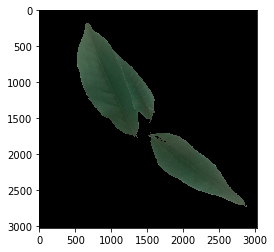

In [26]:
home_dir = str(Path.home())
DATADIR_TRAIN = home_dir + "/Documents/preprocessed-tea-leaf-dataset/train"
DATADIR_TEST = home_dir + "/Documents/preprocessed-tea-leaf-dataset/test"

CATEGORIES = ["ready", "not-ready"]

for category in CATEGORIES:
    path = os.path.join(DATADIR_TEST,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break 
    break 
    

In [27]:
IMG_SIZE = 50

training_data = []
testing_data = []
def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR_TRAIN,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num]) 
            except Exception as e:
                pass

create_training_data()


100%|██████████| 383/383 [00:06<00:00, 60.01it/s]


In [28]:
def create_testing_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR_TEST,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass

create_testing_data()


100%|██████████| 127/127 [00:02<00:00, 56.92it/s]


In [29]:
import random

random.shuffle(training_data)
random.shuffle(testing_data)


In [30]:
X_train = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

# print(X_train[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [31]:
X_test = []
y_test = []

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

# print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [32]:
import pickle

pickle_out = open("/home/hashan/PycharmProjects/TeaLeafClassifier/dataset/X_Train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("/home/hashan/PycharmProjects/TeaLeafClassifier/dataset/Y_Train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("/home/hashan/PycharmProjects/TeaLeafClassifier/dataset/X_Test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("/home/hashan/PycharmProjects/TeaLeafClassifier/dataset/Y_Test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()
